In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/data_.zip', 'r') as zip_ref:
    zip_ref.extractall('')
# with zipfile.ZipFile('/content/drive/MyDrive/sardin.zip', 'r') as zip_ref:
#     zip_ref.extractall('')
# with zipfile.ZipFile('/content/drive/MyDrive/chandana.zip', 'r') as zip_ref:
#     zip_ref.extractall('')

**Importing the Dependencies**

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
Ilish_pic= os.listdir('ilish')
print(Ilish_pic[0:5])
print(Ilish_pic[-5:])

print()

['6373.webp', '5810.webp', '1162.webp', '3737.webp', '5992.webp']
['6713.webp', '6762.webp', '3880.webp', '131.webp', '4243.webp']



In [5]:
Sardin_pic= os.listdir('sardin')

In [6]:
Chandana_pic= os.listdir('chandana')

In [7]:
print('Ilish images:', len(Ilish_pic))
print('Sardin images:', len(Sardin_pic))
print('Chandana images:', len(Chandana_pic))

Ilish images: 7000
Sardin images: 7000
Chandana images: 7000


**Creating Labels for the two class of Images**

Ilish  -->   0

Sardin  -->  1

Chandana --> 2

In [8]:
# create the labels

Ilish_labels = [0]*6000

Sardin_labels = [1]*6000

Chandana_labels = [2]*6000

In [9]:
print(Ilish_labels[0:5])

print(Sardin_labels[0:5])

print(Chandana_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]


In [10]:
print(len(Ilish_labels))
print(len(Sardin_labels))
print(len(Chandana_labels))

6000
6000
6000


In [11]:
labels = Ilish_labels + Sardin_labels + Chandana_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

18000
[0, 0, 0, 0, 0]
[2, 2, 2, 2, 2]


**Displaying the Images**

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [12]:
import numpy as np
import random
from PIL import Image

# Parameters
image_number = 6000  # Number of images to select from each type

# Initialize the list to store the images
data = []

# Process ilish images
ilish_path = 'ilish/'
Ilish_pic = sorted(os.listdir(ilish_path))  # Make sure the images are in order
random.shuffle(Ilish_pic)  # Shuffle images to get random ones
for img_file in Ilish_pic[:image_number]:
    image = Image.open(ilish_path + img_file)
    image = image.resize((224, 224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Process sardin images
sardin_path = 'sardin/'
Sardin_pic = sorted(os.listdir(sardin_path))  # Make sure the images are in order
random.shuffle(Sardin_pic)  # Shuffle images to get random ones
for img_file in Sardin_pic[:image_number]:
    image = Image.open(sardin_path + img_file)
    image = image.resize((224, 224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Process chandana images
chandana_path = 'chandana/'
Chandana_pic = sorted(os.listdir(chandana_path))  # Make sure the images are in order
random.shuffle(Chandana_pic)  # Shuffle images to get random ones
for img_file in Chandana_pic[:image_number]:
    image = Image.open(chandana_path + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Now, `data` contains 4000 random images from each type, for a total of 12,000 images.

In [13]:
# Convert labels to numpy array for easy processing
labels = np.array(labels)

# Count the number of images in each class
unique, counts = np.unique(labels, return_counts=True)

# Print the number of images for each class
class_counts = dict(zip(unique, counts))
print(f"Class counts: {class_counts}")

Class counts: {0: 6000, 1: 6000, 2: 6000}


array([[[ 17,  13,  12],
        [ 17,  13,  12],
        [ 18,  14,  13],
        ...,
        [  9,   9,   9],
        [  7,   5,   6],
        [  6,   6,   6]],

       [[ 22,  17,  14],
        [ 21,  16,  13],
        [ 17,  13,  12],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  7,   7,   7]],

       [[ 23,  18,  14],
        [ 26,  18,  16],
        [ 19,  13,  13],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [ 12,  12,  12]],

       ...,

       [[100, 107, 126],
        [105, 112, 131],
        [110, 117, 136],
        ...,
        [174, 179, 198],
        [179, 184, 203],
        [171, 177, 195]],

       [[101, 108, 127],
        [106, 113, 132],
        [110, 117, 136],
        ...,
        [172, 177, 196],
        [183, 188, 207],
        [170, 175, 194]],

       [[106, 111, 132],
        [100, 107, 125],
        [100, 107, 126],
        ...,
        [175, 180, 199],
        [178, 183, 203],
        [166, 171, 190]]], dtype=uint8)
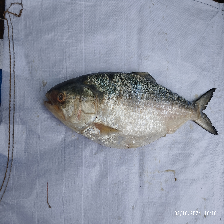

In [14]:
data[50]

In [15]:
type(data)

list

In [16]:
len(data)

18000

array([[[190, 190, 190],
        [193, 193, 193],
        [185, 185, 185],
        ...,
        [ 49,  27,  16],
        [ 50,  30,  21],
        [ 49,  27,  16]],

       [[188, 188, 188],
        [201, 201, 201],
        [196, 196, 196],
        ...,
        [ 50,  23,  14],
        [ 55,  30,  23],
        [ 48,  24,  14]],

       [[203, 203, 203],
        [201, 201, 203],
        [186, 186, 186],
        ...,
        [ 47,  20,  13],
        [ 46,  21,  14],
        [ 50,  25,  18]],

       ...,

       [[191, 191, 189],
        [175, 175, 175],
        [161, 161, 161],
        ...,
        [181, 181, 181],
        [192, 192, 192],
        [181, 181, 181]],

       [[191, 191, 189],
        [153, 153, 151],
        [165, 165, 163],
        ...,
        [180, 180, 180],
        [192, 192, 192],
        [183, 183, 181]],

       [[173, 173, 171],
        [141, 141, 139],
        [152, 151, 149],
        ...,
        [183, 183, 183],
        [182, 182, 182],
        [192, 192, 190]]], dtype=uint8)
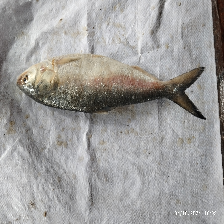

In [17]:
data[0]

In [18]:
type(data[0])

numpy.ndarray

In [19]:
data[0].shape

(224, 224, 3)

In [20]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [21]:
type(X)

numpy.ndarray

In [22]:
type(Y)

numpy.ndarray

In [23]:
print(X.shape)
print(Y.shape)

(18000, 224, 224, 3)
(18000,)


In [24]:
print(Y)

[0 0 0 ... 2 2 2]


**Train Test Split**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(18000, 224, 224, 3) (14400, 224, 224, 3) (3600, 224, 224, 3)


In [27]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 38,  18, 216],
        [121, 255, 120],
        [252, 121,   0],
        ...,
        [252, 218,  32],
        [ 30, 146, 140],
        [ 52, 255, 200]],

       [[ 43,  94, 208],
        [ 94, 233, 178],
        [  0, 206, 222],
        ...,
        [219, 196,   2],
        [249, 204, 166],
        [ 70,  80,  62]],

       [[  0, 158,   0],
        [159,   2, 167],
        [117, 148,  43],
        ...,
        [ 36, 114, 255],
        [  0,  66,   0],
        [ 72, 150,  47]],

       ...,

       [[  0,   0,  37],
        [157, 113, 255],
        [186, 250, 129],
        ...,
        [  0, 158, 153],
        [126,   0,   0],
        [  0, 212,   0]],

       [[255, 118, 127],
        [ 10,  46, 154],
        [178,   0, 255],
        ...,
        [220, 255,  70],
        [174, 172, 158],
        [ 26, 255,  23]],

       [[ 81,  76,   0],
        [  0,   0,   0],
        [  0,   0,  29],
        ...,
        [255, 232,  62],
        [177, 255,  64],
        [118,  73, 137]]], dtype=uint8)
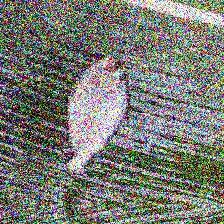

In [28]:
X_train[0]

#CNN

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, r2_score
import seaborn as sns

# Build a CNN model
input_shape = X_train_scaled.shape[1:]  # Dynamically set input shape

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')  # Adjust for the number of classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train_scaled, Y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)

# Predictions
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Accuracy
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.5859 - loss: 1.0731
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9057 - loss: 0.2520
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9391 - loss: 0.1713
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9569 - loss: 0.1149
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9588 - loss: 0.1065
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9773 - loss: 0.0605
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9803 - loss: 0.0610
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9868 - loss: 0.0446
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9887 - loss: 0.0317
Epoch 10/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9918 - loss: 0.0253
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Train Accuracy: 0.9956
Test Accuracy: 0.9619


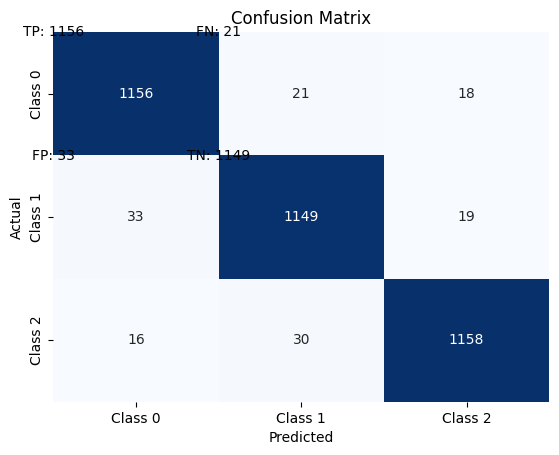

In [30]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Class 0", "Class 1", "Class 2"])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Class 0", "Class 1", "Class 2"])
plt.text(0, 0, f"TP: {cm[0, 0]}", ha='center', va='center', color='black')
plt.text(1, 0, f"FN: {cm[0, 1]}", ha='center', va='center', color='black')
plt.text(0, 1, f"FP: {cm[1, 0]}", ha='center', va='center', color='black')
plt.text(1, 1, f"TN: {cm[1, 1]}", ha='center', va='center', color='black')
plt.show()


In [31]:
# F1 Score
f1 = f1_score(Y_test, Y_test_pred, average='weighted')
print(f"F1 Score (Weighted): {f1:.4f}")

F1 Score (Weighted): 0.9619


In [32]:
# R2 Score
# R2 is calculated based on probabilities
r2 = r2_score(Y_test, Y_test_pred_prob.argmax(axis=1))
print(f"R2 Score: {r2:.4f}")


R2 Score: 0.9004


In [33]:
# Save the model
model.save("cnn_model.h5")
print("Model saved as cnn_model.h5")

Model saved as cnn_model.h5


In [37]:
model.save("cnn.h5")

#Resnet50

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

Starting Fold 1
Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.3794 - loss: 1.2115 - val_accuracy: 0.4931 - val_loss: 1.0377
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.4582 - loss: 1.0274 - val_accuracy: 0.5108 - val_loss: 0.9878
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5193 - loss: 0.9768 - val_accuracy: 0.6389 - val_loss: 0.9101
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5635 - loss: 0.9345 - val_accuracy: 0.6156 - val_loss: 0.8936
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5776 - loss: 0.9152 - val_accuracy: 0.5177 - val_loss: 0.9171
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


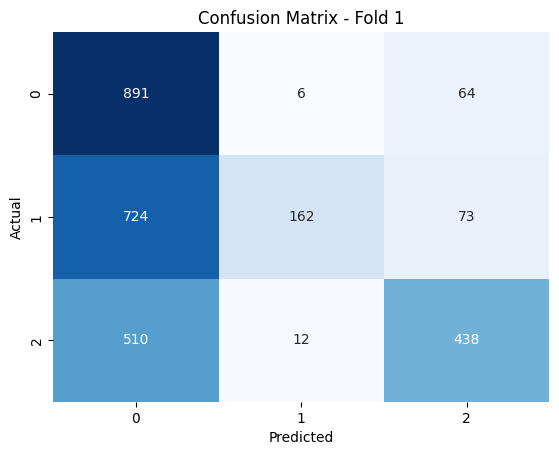

Fold 1 - F1 Score: 0.4776
Fold 1 - R² Score: -0.6195

Starting Fold 2
Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.5888 - loss: 0.8971 - val_accuracy: 0.5677 - val_loss: 0.8612
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5937 - loss: 0.8751 - val_accuracy: 0.4722 - val_loss: 0.9863
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6132 - loss: 0.8570 - val_accuracy: 0.5434 - val_loss: 1.0129
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.6209 - loss: 0.8451 - val_accuracy: 0.6774 - val_loss: 0.7481
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6317 - loss: 0.8289 - val_accuracy: 0.7038 - val_loss: 0.7139
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


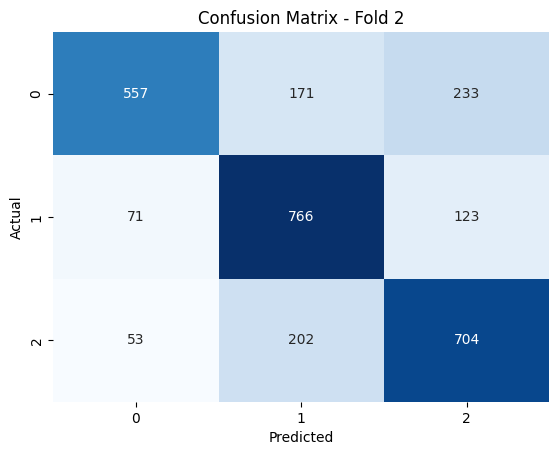

Fold 2 - F1 Score: 0.7019
Fold 2 - R² Score: 0.1089

Starting Fold 3
Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.6454 - loss: 0.7997 - val_accuracy: 0.6816 - val_loss: 0.7467
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6603 - loss: 0.7774 - val_accuracy: 0.7007 - val_loss: 0.7090
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6577 - loss: 0.7835 - val_accuracy: 0.7049 - val_loss: 0.6993
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6578 - loss: 0.7701 - val_accuracy: 0.5792 - val_loss: 0.9835
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6676 - loss: 0.7568 - val_accuracy: 0.6736 - val_loss: 0.7363
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


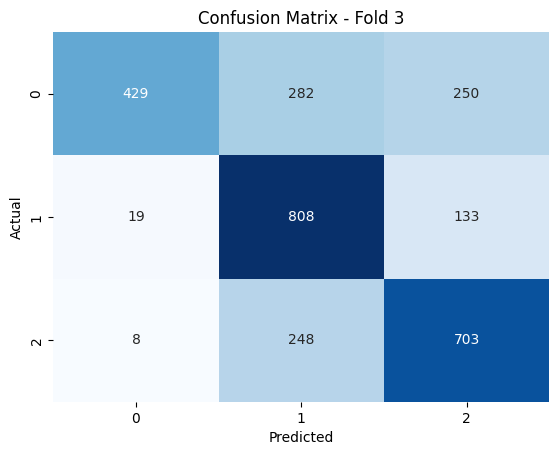

Fold 3 - F1 Score: 0.6654
Fold 3 - R² Score: 0.1073

Starting Fold 4
Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.6869 - loss: 0.7334 - val_accuracy: 0.6896 - val_loss: 0.7232
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6796 - loss: 0.7388 - val_accuracy: 0.7337 - val_loss: 0.6481
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6884 - loss: 0.7170 - val_accuracy: 0.7434 - val_loss: 0.6382
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6930 - loss: 0.7035 - val_accuracy: 0.6389 - val_loss: 0.7681
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6950 - loss: 0.7120 - val_accuracy: 0.7469 - val_loss: 0.6116
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


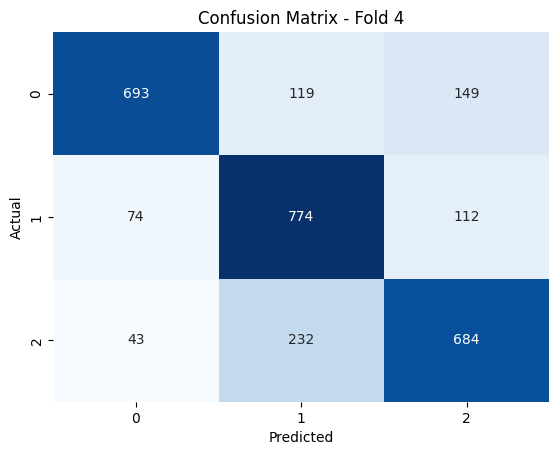

Fold 4 - F1 Score: 0.7479
Fold 4 - R² Score: 0.3203

Starting Fold 5
Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.7069 - loss: 0.6835 - val_accuracy: 0.7406 - val_loss: 0.6234
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7003 - loss: 0.6933 - val_accuracy: 0.7115 - val_loss: 0.6559
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7169 - loss: 0.6708 - val_accuracy: 0.7580 - val_loss: 0.5853
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7054 - loss: 0.6760 - val_accuracy: 0.7260 - val_loss: 0.6327
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7132 - loss: 0.6742 - val_accuracy: 0.7288 - val_loss: 0.6267


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, r2_score
import seaborn as sns

# Initialize ResNet model with transfer learning
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # Adjust number of classes as needed
model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, Y_train)):
    print(f"\nStarting Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Train the model
    history = model.fit(X_train_fold, Y_train_fold,
                        validation_data=(X_val_fold, Y_val_fold),
                        epochs=5,  # Adjust epochs as needed
                        batch_size=32,
                        verbose=1)

    # Evaluate the model
    train_loss, train_accuracy = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
    val_loss, val_accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    # Predict on validation data
    val_predictions_prob = model.predict(X_val_fold)
    val_predictions = np.argmax(val_predictions_prob, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(Y_val_fold, val_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # F1 Score
    f1 = f1_score(Y_val_fold, val_predictions, average='weighted')
    print(f"Fold {fold + 1} - F1 Score: {f1:.4f}")

    # R² Score
    r2 = r2_score(Y_val_fold, np.argmax(val_predictions_prob, axis=1))
    print(f"Fold {fold + 1} - R² Score: {r2:.4f}")

    # Save fold results
    kfold_results.append({
        'fold': fold + 1,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'f1_score': f1,
        'r2_score': r2,
        'confusion_matrix': cm
    })

In [ ]:

# Print overall results
for result in kfold_results:
    print(f"\nFold {result['fold']}:")
    print(f"  Train Accuracy: {result['train_accuracy']:.4f}")
    print(f"  Validation Accuracy: {result['val_accuracy']:.4f}")
    print(f"  F1 Score: {result['f1_score']:.4f}")
    print(f"  R² Score: {result['r2_score']:.4f}")

In [ ]:
# Save the trained model
model.save("resnet_stratified_kfold.h5")
print("Model saved as resnet_stratified_kfold.h5")

#EfficientNetB0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, r2_score
import seaborn as sns

# Initialize EfficientNet model with transfer learning
input_shape = (224, 224, 3)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # Adjust for the number of classes
model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, Y_train)):
    print(f"\nStarting Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Train the model
    history = model.fit(X_train_fold, Y_train_fold,
                        validation_data=(X_val_fold, Y_val_fold),
                        epochs=5,  # Adjust epochs as needed
                        batch_size=32,
                        verbose=1)

    # Evaluate the model
    train_loss, train_accuracy = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
    val_loss, val_accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    # Predict on validation data
    val_predictions_prob = model.predict(X_val_fold)
    val_predictions = np.argmax(val_predictions_prob, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(Y_val_fold, val_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # F1 Score
    f1 = f1_score(Y_val_fold, val_predictions, average='weighted')
    print(f"Fold {fold + 1} - F1 Score: {f1:.4f}")

    # R² Score
    r2 = r2_score(Y_val_fold, val_predictions)
    print(f"Fold {fold + 1} - R² Score: {r2:.4f}")

    # Save fold results
    kfold_results.append({
        'fold': fold + 1,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'f1_score': f1,
        'r2_score': r2,
        'confusion_matrix': cm
    })

# Save the trained model
model.save("efficientnet_stratified_kfold.h5")
print("Model saved as efficientnet_stratified_kfold.h5")

# Print overall results
for result in kfold_results:
    print(f"\nFold {result['fold']}:")
    print(f"  Train Accuracy: {result['train_accuracy']:.4f}")
    print(f"  Validation Accuracy: {result['val_accuracy']:.4f}")
    print(f"  F1 Score: {result['f1_score']:.4f}")
    print(f"  R² Score: {result['r2_score']:.4f}")


#End